# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Reload Clean Data

In [2]:
df = pd.read_csv('Data/strokedata.csv')
print(df.info())
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Multivariate Visuals

Explore relationships between variables and differences in groups!

## Identifying Correlations

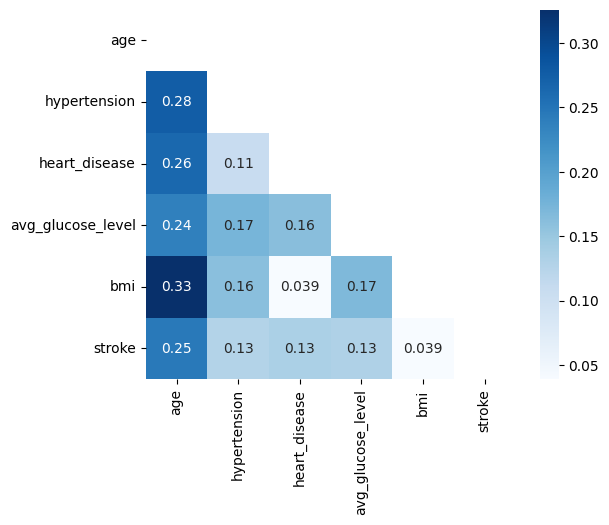

In [3]:
## heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Blues', annot=True, mask=mask);

As we can see that the correlations between features and target(stroke) and between each feature are all weak. 

we can tell from this correlation result that there is no one specific factor that plays a crucial role on causing the stroke. 

### The Percentage of Getting Stroke in Different groups

In [4]:
## creating a pie chart function for all groups.
def stroke_group(x, y, z):
    fig, ax = plt.subplots(figsize=(4, 3), subplot_kw=dict(aspect="equal"))

    groups = [x, y]
    

    data = [float(x.split()[0]) for x in groups]
    group = [x.split()[-1] for x in groups]



    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

    ax.legend(wedges, groups,
          title="Stroke Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(f"Stroke or Nonstroke {z}")

    plt.tight_layout()
    
    return fig,ax

In [5]:
## Slicing out all the groups.

df_male = df.loc[df['gender']=='Male']
male = df_male['stroke'].value_counts()

df_female = df.loc[df['gender']=='Female']
female = df_female['stroke'].value_counts()

df_married = df.loc[df['ever_married']=='Yes']
married = df_married['stroke'].value_counts()

df_nonmarried = df.loc[df['ever_married']=='No']
nonmarried = df_nonmarried['stroke'].value_counts()

df_urban = df.loc[df['Residence_type']=='Urban']
urban = df_urban['stroke'].value_counts()

df_rural = df.loc[df['Residence_type']=='Rural']
rural = df_rural['stroke'].value_counts()

df_hypertension = df.loc[df['hypertension']==1]
hypertension = df_hypertension['stroke'].value_counts()

df_nonhypertension = df.loc[df['hypertension']==0]
nonhypertension = df_nonhypertension['stroke'].value_counts()

df_nonheart = df.loc[df['heart_disease']==0]
nonheart = df_nonheart['stroke'].value_counts()

df_heart = df.loc[df['heart_disease']==1]
heart = df_heart['stroke'].value_counts()

df_smoke = df.loc[df['smoking_status']=='smokes']
smoke = df_smoke['stroke'].value_counts()

df_nonsmoke = df.loc[df['smoking_status']=='never smoked']
nonsmoke = df_nonsmoke['stroke'].value_counts()

df_self = df.loc[df['work_type']=='Self-employed']
self = df_self['stroke'].value_counts()

df_private = df.loc[df['work_type']=='Private']
private = df_private['stroke'].value_counts()

df_gov = df.loc[df['work_type']=='Govt_job']
gov = df_gov['stroke'].value_counts()

In [6]:
print(f'Nonstroke or Stroke in male: \n {male}.')
print(f'Nonstroke or Stroke in female: \n {female}.')
print(f'Nonstroke or Stroke in married: \n {married}.')
print(f'Nonstroke or Stroke in nonmarried: \n {nonmarried}.')
print(f'Nonstroke or Stroke in urban: \n {urban}.')
print(f'Nonstroke or Stroke in rural: \n {rural}.')
print(f'Nonstroke or Stroke in hypertension: \n {hypertension}.')
print(f'Nonstroke or Stroke in nonhypertension: \n {nonhypertension}.')
print(f'Nonstroke or Stroke in nonheart: \n {nonheart}.')
print(f'Nonstroke or Stroke in heart: \n {heart}.')
print(f'Nonstroke or Stroke in smoke: \n {smoke}.')
print(f'Nonstroke or Stroke in nonsmoke: \n {nonsmoke}.')
print(f'Nonstroke or Stroke in self: \n {self}.')
print(f'Nonstroke or Stroke in private: \n {private}.')
print(f'Nonstroke or Stroke in gov: \n {gov}.')

Nonstroke or Stroke in male: 
 0    2007
1     108
Name: stroke, dtype: int64.
Nonstroke or Stroke in female: 
 0    2853
1     141
Name: stroke, dtype: int64.
Nonstroke or Stroke in married: 
 0    3133
1     220
Name: stroke, dtype: int64.
Nonstroke or Stroke in nonmarried: 
 0    1728
1      29
Name: stroke, dtype: int64.
Nonstroke or Stroke in urban: 
 0    2461
1     135
Name: stroke, dtype: int64.
Nonstroke or Stroke in rural: 
 0    2400
1     114
Name: stroke, dtype: int64.
Nonstroke or Stroke in hypertension: 
 0    432
1     66
Name: stroke, dtype: int64.
Nonstroke or Stroke in nonhypertension: 
 0    4429
1     183
Name: stroke, dtype: int64.
Nonstroke or Stroke in nonheart: 
 0    4632
1     202
Name: stroke, dtype: int64.
Nonstroke or Stroke in heart: 
 0    229
1     47
Name: stroke, dtype: int64.
Nonstroke or Stroke in smoke: 
 0    747
1     42
Name: stroke, dtype: int64.
Nonstroke or Stroke in nonsmoke: 
 0    1802
1      90
Name: stroke, dtype: int64.
Nonstroke or Str

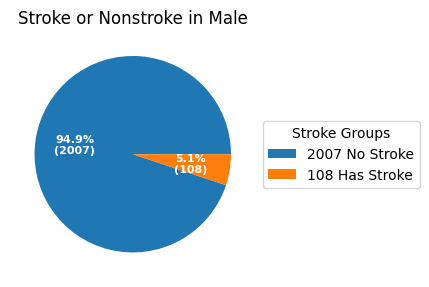

In [7]:
male_fig, ax = stroke_group('2007 No Stroke', '108 Has Stroke', 'in Male')

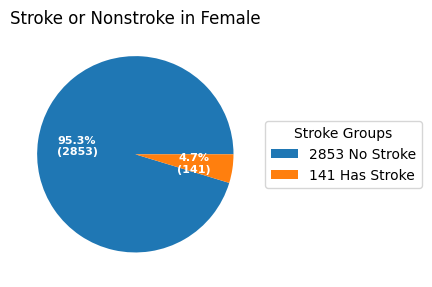

In [8]:
female_fig, ax = stroke_group('2853 No Stroke', '141 Has Stroke', 'in Female')

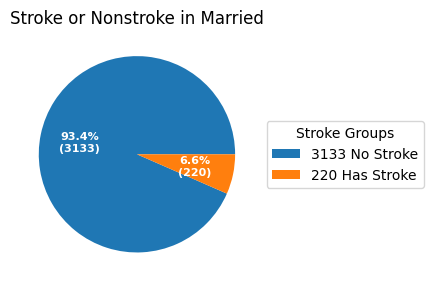

In [9]:
married_fig, ax = stroke_group('3133 No Stroke', '220 Has Stroke', 'in Married')

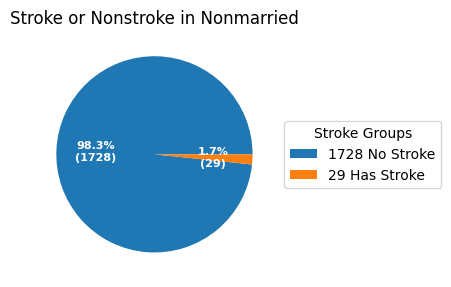

In [10]:
nonmarried_fig, ax = stroke_group('1728 No Stroke', '29 Has Stroke', 'in Nonmarried')

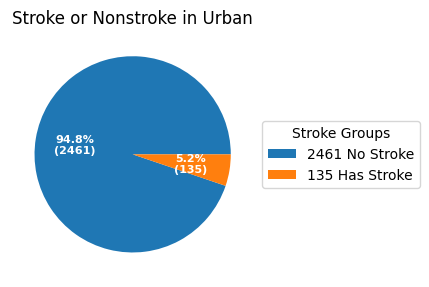

In [11]:
urban_fig, ax = stroke_group('2461 No Stroke', '135 Has Stroke', 'in Urban')

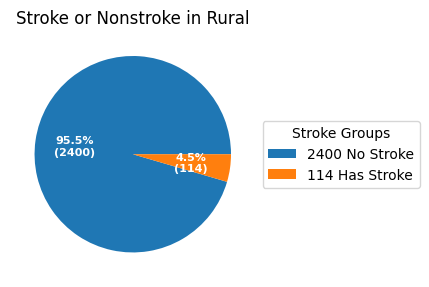

In [12]:
rural_fig, ax = stroke_group('2400 No Stroke', '114 Has Stroke', 'in Rural')

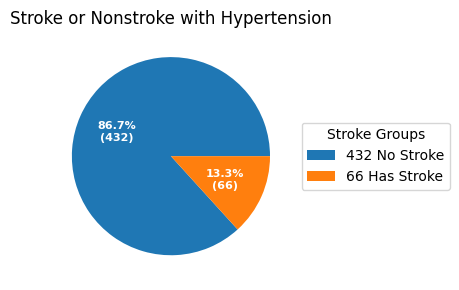

In [13]:
hypertension_fig, ax = stroke_group('432 No Stroke', '66 Has Stroke', 'with Hypertension')

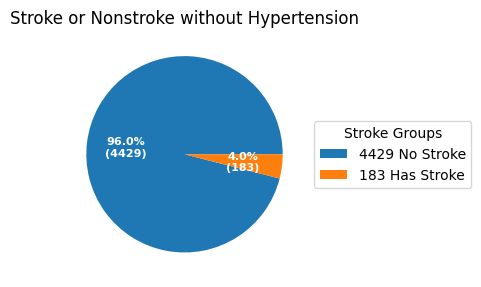

In [14]:
nonhypertension_fig, ax = stroke_group('4429 No Stroke', '183 Has Stroke', 'without Hypertension')

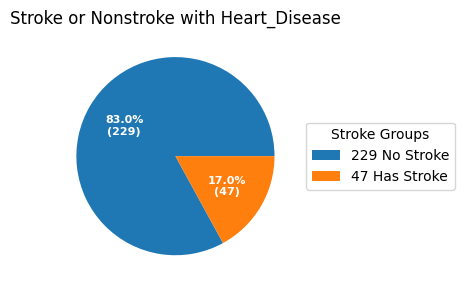

In [15]:
nonheart_fig, ax = stroke_group('229 No Stroke', '47 Has Stroke', 'with Heart_Disease')

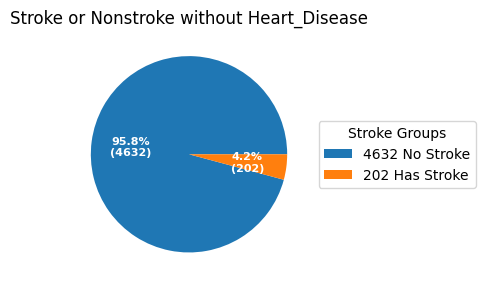

In [16]:
heart_fig, ax = stroke_group('4632 No Stroke', '202 Has Stroke', 'without Heart_Disease')

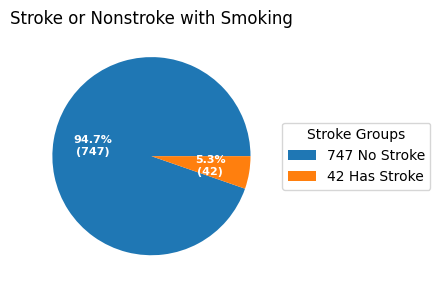

In [17]:
smoke_fig, ax = stroke_group('747 No Stroke', '42 Has Stroke', 'with Smoking')

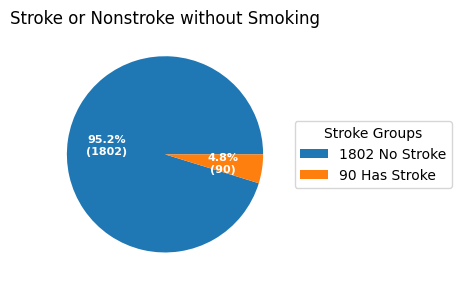

In [18]:
nonsmoke_fig, ax = stroke_group('1802 No Stroke', '90 Has Stroke', 'without Smoking')

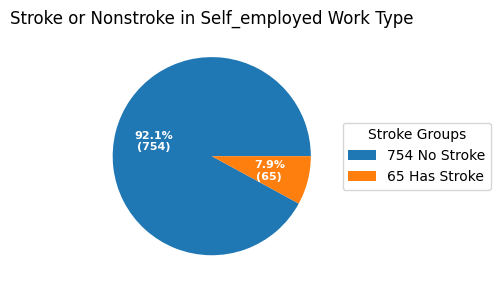

In [19]:
self_fig, ax = stroke_group('754 No Stroke', '65 Has Stroke', 'in Self_employed Work Type')

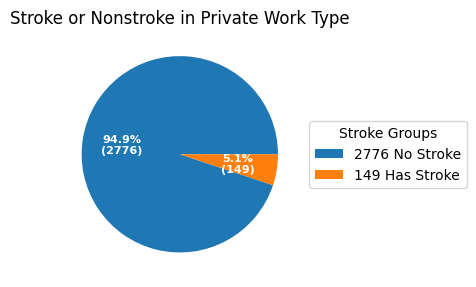

In [20]:
private_fig, ax = stroke_group('2776 No Stroke', '149 Has Stroke', 'in Private Work Type')

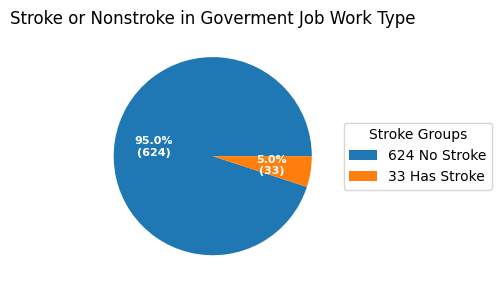

In [21]:
gov_fig, ax = stroke_group('624 No Stroke', '33 Has Stroke', 'in Goverment Job Work Type')

Text(0.4, 38, 'Stroke increasing')

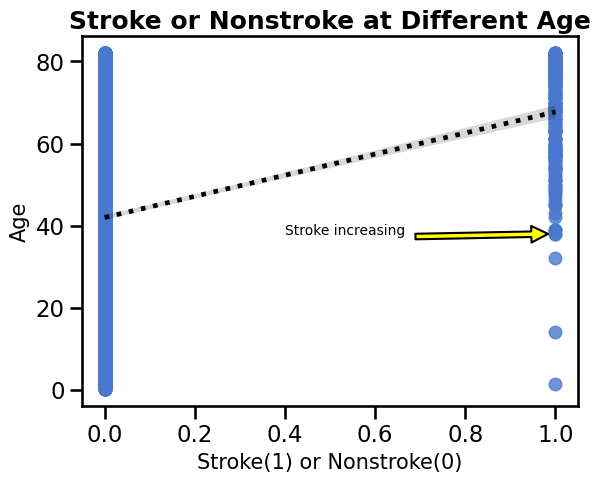

In [40]:
sns.set_context('talk')
plt.style.use(['seaborn-muted'])
ax = sns.regplot(data=df, x = 'stroke', y = 'age', line_kws = {'color':'black', 'ls': ':'})
ax.set_title('Stroke or Nonstroke at Different Age', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Stroke(1) or Nonstroke(0)', fontsize = 15)
ax.set_ylabel('Age', fontsize = 15)
ax.annotate('Stroke increasing', fontsize = 10, xy =(1, 38),
                xytext =(0.4, 38), 
                arrowprops = dict(facecolor ='yellow',
                                  shrink = 0.05),)

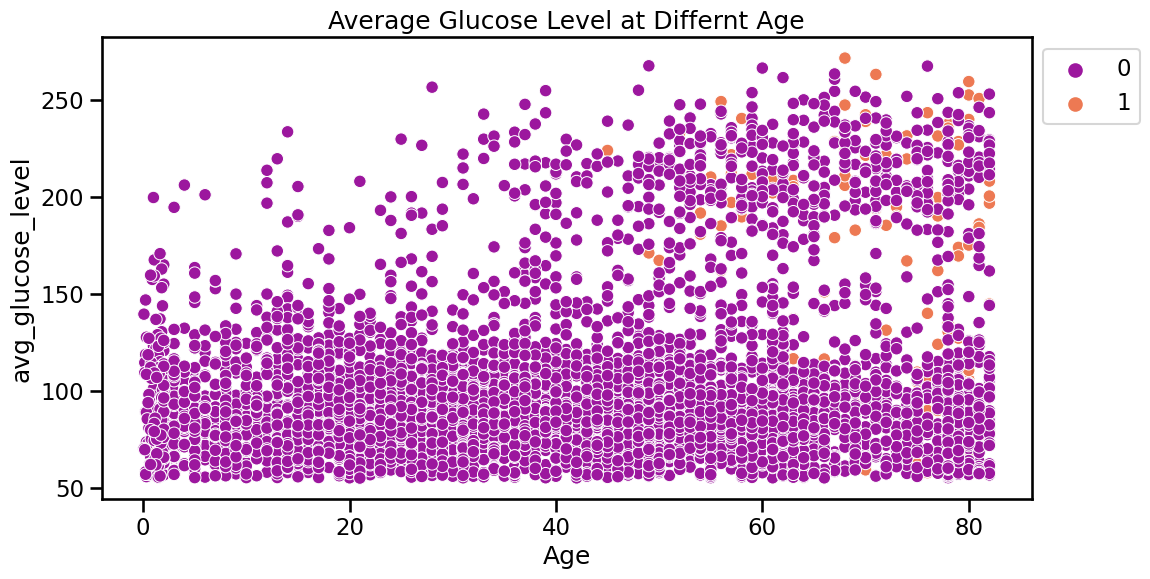

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(data=df, x = 'age', y = 'avg_glucose_level', hue = 'stroke', palette = 'plasma')
ax.set_title('Average Glucose Level at Differnt Age')
ax.set_xlabel('Age')
ax.legend(bbox_to_anchor=[1,1]);